# Introduction

This notebook compares performance of three methods:

1. Original method (PFPF ranking)
2. Second-order random walks + PFPF metric
3. Node2Vec (Second order RWs + cosine similarity)

Node2Vec allows for two main types of random walks (and interpolations between them). The type of random walk can be modified by selecting two hyperparameters, $ p $ and $ q $.

The illustration of second-order (N2V) random walks is below (source: https://arxiv.org/pdf/1607.00653.pdf)

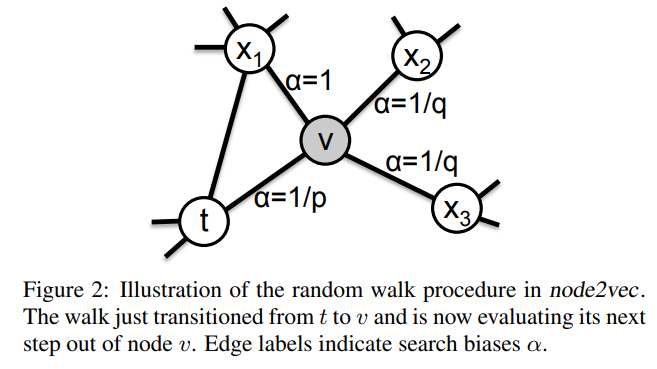


We evaluate the three methods using 100 labelled pages and the following score (*higher score = better*)

$$ \frac{ \text{median(irrelevant)} - \text{median(relevant)} }{ \sigma( \text{irrelevant} ) + \sigma( \text{relevant} ) } $$

where "relevant" is a ranking (top = 1, bottom = 100) of pages labelled as relevant to a user journey, and similarly for "irrelevant" , and $ \sigma $ is a standard deviation.



# Packages

In [1]:

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns


 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid

import os
import pickle
import re


import random
from itertools import chain

from gensim.models import Word2Vec

from pathlib import Path

In [ ]:

import sys
sys.path.insert(0,'..')
import src.randomwalks as rw
import src.functions as sf

# Load graphs

In [ ]:
# Economic recovery pages
er_pages = pd.read_excel('../data/inputs/2021-11-12 - Economic recovery pages.xlsx', sheet_name='Top pages').pagePathv2.to_list()
er_pages = [page for page in er_pages if str(page) != 'nan']


G, A, T = sf.get_er_graph("../data/inputs/functional_session_hit_directed_graph_er.gpickle")


In [ ]:
# set the seeds from where random walks will be initialised
seeds = (
    '/find-a-job',
    '/universal-credit',
    '/government/collections/financial-support-for-businesses-during-coronavirus-covid-19',
)

In [24]:
# pages_list = list(G.nodes().keys())

# Node2vec random walks

This is just an example of how to run a Node2vec model

In [4]:
sf.set_seed(1564)

G_homophily = sf.Graph(G, is_directed = True, p = 1, q = 0.2)
G_homophily.preprocess_transition_probs()

G_homo_results = G_homophily.simulate_walks_from_seeds(num_walks = 100, walk_length = 100, seeds = seeds)

page_scores_homo = rw.page_freq_path_freq_ranking(G_homo_results)
page_scores_homo.sort_values(by = "tfdf_mean", ascending = False).head(20)

Walk iteration:
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
Walk iteration:
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 /

,pagePath,tfdf_saliency,tfdf_max,tfdf_mean
3186,/,235410.0,2394.0,784.700000
2802,/find-a-job,196833.0,2457.0,656.110000
2727,/search/all,134160.0,1680.0,447.200000
2889,/prove-right-to-work,120046.0,2123.0,400.153333
617,/browse/working,102342.0,1332.0,341.140000
1802,/browse/working/state-pension,99000.0,1584.0,330.000000
3206,/apply-apprenticeship,78624.0,1512.0,262.080000
1332,/contact-jobcentre-plus,61054.0,1068.0,203.513333
1646,/jobseekers-allowance,60896.0,1730.0,202.986667
1366,/check-state-pension,55583.0,1467.0,185.276667


# Performance metrics

## Original method

In [23]:
initial_ranking = pd.read_csv("../data/outputs/original_method/pages_ranked_with_data_replication.csv")

In [24]:
labelled_data_1 = pd.read_csv('../data/inputs/pages_ranked_with_data_labelled.csv')
labelled_data_1 = labelled_data_1.loc[:,["page path", "label"]]

In [25]:
sf.calc_median_difference_n2v(initial_ranking, labelled_data_1, standardise = True, page_path = "page path")

-0.008671958785557335

Now average the scores over multiple runs :

In [26]:
original_scores = list()
n_iters = 10

for i in range(n_iters):

    page_scores = pd.read_csv(r'../data/outputs/original_method/original_approach/ranked_original_approad_' + str(i))
    
    score = sf.calc_median_difference_n2v(page_scores, labelled_data_1, page_path = "pagePath")
    original_scores.append(score)

In [27]:
np.mean(original_scores)

-0.016184804177201674

In [28]:
np.std(original_scores)

0.032761859676132925

## 2nd order RWs + PFPF metric

This loop creates ranking for different hyperparam combinations. Results are saved in files 
- `scores_pq_avg.csv`
- `scores_pq_avg_2.csv`
- `scores_pq_avg_3.csv`

These are summarised in file:
- `scores_biasedrws_averages.xlsx`

In [13]:


sf.set_seed(4647)


p_list = [0.2, 0.5, 1, 2, 5, 100]
q_list = [0.2, 0.5, 1, 2, 5, 100]



score_df_n2vrw = pd.DataFrame(index = p_list, columns = q_list)
pages_visited_df = pd.DataFrame(index = p_list, columns = q_list)


param_grid = {'p': p_list, 'q': q_list}

n_iters = 10

for params in ParameterGrid(param_grid):
    p = params["p"]
    q = params["q"]
    
    scores_list = []
    
    for i in range(n_iters):
        G_graph = sf.Graph(G, is_directed = True, p = p, q = q)
        G_graph.preprocess_transition_probs()

        G_graph_results = G_graph.simulate_walks_from_seeds(num_walks = 100, walk_length = 100, seeds = seeds)
        page_scores_graph = rw.page_freq_path_freq_ranking(G_graph_results)
    
        score = sf.calc_median_difference_n2v(page_scores_graph, labelled_data_1)
        
        scores_list.append(score)
        
    score_mean = np.mean(scores_list)
    print(score_mean)
    score_df_n2vrw.loc[p, q] = score_mean
    pages_visited_df.loc[p, q] = len(G_graph_results["pages_visited"])
    
    

Walk iteration:
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
Walk iteration:
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 /

KeyboardInterrupt: 

In [37]:
# score_df_n2vrw.to_csv("./data/outputs/scores_pq_avg_3.csv")

In [29]:
pd.read_csv("../data/outputs/node2vec/scores_pq_avg.csv")

,Unnamed: 0,0.2,0.5,1.0,2.0,5.0
0,0.2,0.141106,0.163084,0.185404,0.227110,0.225518
1,0.5,0.135897,0.167395,0.175391,0.213520,0.228554
2,1.0,0.129306,0.187531,0.165213,0.211557,0.230282
3,2.0,0.117971,0.175164,0.199424,0.207217,0.226957
4,5.0,0.148901,0.181685,0.205770,0.203852,0.260805


## N2V distance

Run N2V with a random gridsearch. Results for all (randomly selected) parameter combinations are available in
- `scores_n2v_gridsearch.csv` (some Excel formatting was needed to get them into a nicer format)
The results are also summarised in `scores_biasedrws_averages.xlsx`

Note that for each hyperparam combination we run model 10 times and average the scores (to make comparisons less random)

Based on the scores the final model is selected (parameters p = 5, q = 10, w = 5, v = 20).



Since it takes a while to run model for all hyperparam combinations, below is a set up for the final model only (hence `_list` variables contain a list of length 1). Results for all hyperparams can be loaded from a saved file (see below).

In [12]:

seed_pages_used = [    
    '/find-a-job',
    '/universal-credit',
    '/government/collections/financial-support-for-businesses-during-coronavirus-covid-19']


# Parameter combinations to try (final model selected, grid params commented out)
p_list = [5] # [1, 5, 10]
q_list = [10] # [1, 5, 10]
w_list = [20] # [2, 5]
v_list = [5] # [10, 20]

num_walks, walk_length = 10, 10

# Form param grid
param_grid = {'p': p_list, 'q': q_list, "window": w_list, "vector_size": v_list}

In [13]:
sf.set_seed(50)



# Number of hyperparams to sampel from grid dictionary
num_hyperpatams = 1 # 20
# output is random, hence run model n_iters times for each hyperparam
# combination, then average over the results
n_iters = 10

results_dict = dict()
ranking_dict = dict()


for iii in range(num_hyperpatams):
    print(iii)
    random_params = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
    
    p = random_params["p"]
    q = random_params["q"]
    vector_size = random_params["vector_size"]
    window = random_params["window"]
    
    ranking_dict["p:" + str(p) + "_" + "q:" + str(q) + "_" + "v:" 
                 + str(vector_size) + "_" + "w:" + str(window)] = dict()

    n2v_distance_scores = []

    for i in range(n_iters):
        page_rank_df, _ = sf.get_n2v_scores(seed_pages_used, G, p, q, num_walks, walk_length, 
                                      window, vector_size)

        score = sf.calc_median_difference_n2v(page_rank_df, labelled_data_1, page_path = "page")

        n2v_distance_scores.append(score)
        
        ranking_dict["p:" + str(p) + "_" + "q:" + str(q) + "_" + "v:" 
                 + str(vector_size) + "_" + "w:" + str(window)][i] = page_rank_df

    results_dict["p:" + str(p) + "_" + "q:" + str(q) + "_" + "v:" 
                 + str(vector_size) + "_" + "w:" + str(window)]  = np.mean(n2v_distance_scores)
#     print(score_mean)
#     score_df_n2vrw.loc[p, q] = score_mean

#     j += 1    

0
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>
Walk iteration:
1 / 10
2 / 10
3 / 10
4 

For all hyperparam combination (here only 1), create ranking by averaging the rankings over 10 runs:

In [14]:
# For the selected hyperparam combination, ranking is constructed by
# averaging over the scores from n_iters
ranking_dg_n2v = ranking_dict['p:5_q:10_v:5_w:20'][0].set_index("page")

for i in range(1,10):
    ranking_dg_n2v +=ranking_dict['p:5_q:10_v:5_w:20'][i].set_index("page")


In [15]:
# Display top 10 pages
ranking_dg_n2v.sort_values("score", ascending = False).iloc[:10, :] 

,score
page,
/government/collections/financial-support-for-businesses-during-coronavirus-covid-19,10.000000
/universal-credit,10.000000
/find-a-job,10.000000
/guidance/universal-credit-advances,9.921551
/advertise-job,9.909312
/contact-jobcentre-plus/new-benefit-claims,9.907759
/universal-credit/contact-universal-credit,9.904338
/universal-credit/eligibility,9.880754
/government/organisations/department-for-work-pensions/about/recruitment,9.873920


The result of the model is random (due to random walks). The results for the model run we used for evaluation can be loaded as below:

In [16]:
# ranking_dg_n2v.to_csv("./outputs/ranking_n2v_p5_q10_v5_w20.csv")
ranking_dg_n2v = pd.read_csv("../data/outputs/node2vec/ranking_n2v_p5_q10_v5_w20.csv")
ranking_dg_n2v.sort_values("score", ascending = False).iloc[:20]

,page,score
0,/universal-credit,10.000000
1,/find-a-job,10.000000
2,/government/collections/financial-support-for-...,10.000000
4,/advertise-job,9.956104
7,/universal-credit/contact-universal-credit,9.924350
22,/contact-jobcentre-plus/new-benefit-claims,9.910041
15,/government/organisations/department-for-work-...,9.887105
56,/universal-credit/how-to-claim,9.887073
5,/guidance/universal-credit-advances,9.882248
13,/apply-universal-credit,9.880878


Results for different hyperparam combinations can be loaded as below:

In [17]:
# dump_pickle_file(results_dict, "n2v_grid_search_scores", dir_path="./outputs")

In [16]:
# save results in a pickle file
# dump_pickle_file(ranking_dict, "ranking_dict_n2v_2607", dir_path="./outputs")
results_load = sf.load_pickle_file("n2v_grid_search_scores", dir_path="../data/outputs/node2vec")
results_load

{'p:5_q:5_v:10_w:5': 0.17751249463484903,
 'p:5_q:10_v:20_w:2': 0.2314314399007261,
 'p:5_q:5_v:10_w:2': 0.16664083548373845,
 'p:5_q:1_v:10_w:5': 0.22079243585332858,
 'p:1_q:10_v:20_w:2': 0.2222689097488583,
 'p:1_q:1_v:20_w:5': 0.24693268907760674,
 'p:10_q:5_v:20_w:2': 0.22558759635707576,
 'p:10_q:5_v:20_w:5': 0.29121377022992073,
 'p:5_q:5_v:20_w:2': 0.21760266787580657,
 'p:10_q:1_v:10_w:5': 0.15840377330265704,
 'p:1_q:1_v:10_w:5': 0.22323912450991892,
 'p:1_q:10_v:20_w:5': 0.3012156871002504,
 'p:5_q:1_v:20_w:5': 0.29386440505146794,
 'p:5_q:1_v:10_w:2': 0.15293263920954556,
 'p:10_q:10_v:20_w:2': 0.18629278774812227,
 'p:5_q:10_v:20_w:5': 0.3395803677235586,
 'p:5_q:1_v:20_w:2': 0.19610914985065558}

# Clustering of ER changes

This short section studies clusters in the 40 economic recovery pages selected by the original method.

The main observation was that there are two main clusters and that the largest cluster corresponds to finding education and or work experience.

The clustering wasn't used in further analysis (and wasn't included in the presentation). 

In [3]:
seed_pages_used = [    
    '/find-a-job',
    '/universal-credit',
    '/government/collections/financial-support-for-businesses-during-coronavirus-covid-19']


page_ranking, model = sf.get_n2v_scores(seed_pages_used, G, 5, 10, num_walks = 10, walk_length = 10, 
                                      window = 20, vector_size = 5)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Word2Vec<vocab=10631, vector_size=5, alpha=0.025>


## Kmean clustering of embeddings

In [4]:
sf.set_seed(4646)

sqd = sf.squared_distances(model, n_components = range(1,20))

Text(0.5, 0, 'Number of clusters')

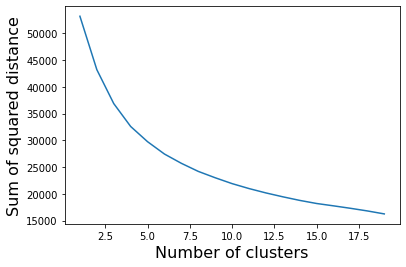

In [5]:
fig, ax = plt.subplots()
sns.lineplot(y = sqd, x = np.arange(1,20))
ax.set_ylabel("Sum of squared distance", fontsize = 16)
ax.set_xlabel("Number of clusters", fontsize = 16)

In [8]:
sf.set_seed(4646)
pages, kmean_labels, distances_to_centres, centres = sf.reduce_dim_kmeans(model, 8)

In [9]:
# Display seed pages and their clusters

# index of er pages
er_pages_indices = [page in er_pages for page in model.wv.index_to_key]         # gives True/False list based on whether key (path) is an ER page
er_pages_ordered = [page for page in model.wv.index_to_key if page in er_pages] # gives a list of ER pages ordere din the same way as their embeddings 

# clusters of ER pages
er_page_clusters = np.array(kmean_labels)[np.array(er_pages_indices)]

er_page_clusters_df = pd.DataFrame(columns = ["page", "cluster"])
er_page_clusters_df["page"] = er_pages_ordered       # include page paths corresponding to the embeddings
er_page_clusters_df["cluster"] = er_page_clusters

In [11]:
# Clusters are numbered randomly: to consider two largest one extract their cluster number
largest_clusters = er_page_clusters_df["cluster"].value_counts(ascending = False)[:2]
largest_clusters = largest_clusters.index

In [12]:
# Form dfs of two largest clusters
er_pages_cluster1 = er_page_clusters_df[er_page_clusters_df["cluster"] == largest_clusters[0]]["page"]
er_pages_cluster2 = er_page_clusters_df[er_page_clusters_df["cluster"] == largest_clusters[1]]["page"]

In [13]:
er_pages_cluster1

0                                           /find-a-job
1                                 /apply-apprenticeship
2       /topic/further-education-skills/apprenticeships
5                                    /become-apprentice
8                         /browse/education/find-course
11                                    /find-traineeship
12                                    /browse/education
13                          /career-skills-and-training
15                             /employing-an-apprentice
16                      /guidance/free-courses-for-jobs
20                        /moving-from-benefits-to-work
21                        /grant-bursary-adult-learners
22                               /advanced-learner-loan
26                           /further-education-courses
27                     /improve-english-maths-it-skills
28                 /business-coronavirus-support-finder
29                                           /education
30    /government/collections/financial-support-

In [14]:
er_pages_cluster2

3                                 /jobseekers-allowance
6                                     /universal-credit
7                                       /access-to-work
9                                 /benefits-calculators
10                    /browse/benefits/looking-for-work
17    /guidance/redundancy-help-finding-work-and-cla...
19                       /how-to-claim-universal-credit
23    /guidance/apply-for-communication-support-at-a...
24                               /work-health-programme
25                             /budgeting-help-benefits
31                         /get-help-savings-low-income
32                         /support-visit-benefit-claim
Name: page, dtype: object

## Subgraph display

In [18]:
# exclude pages that would distort the plot (as they are too far from the main cloud of nodes).
er_pages_exclude = ['/guidance/claim-back-statutory-sick-pay-paid-to-employees-due-to-coronavirus-covid-19',
                   '/find-driving-instructor-training']

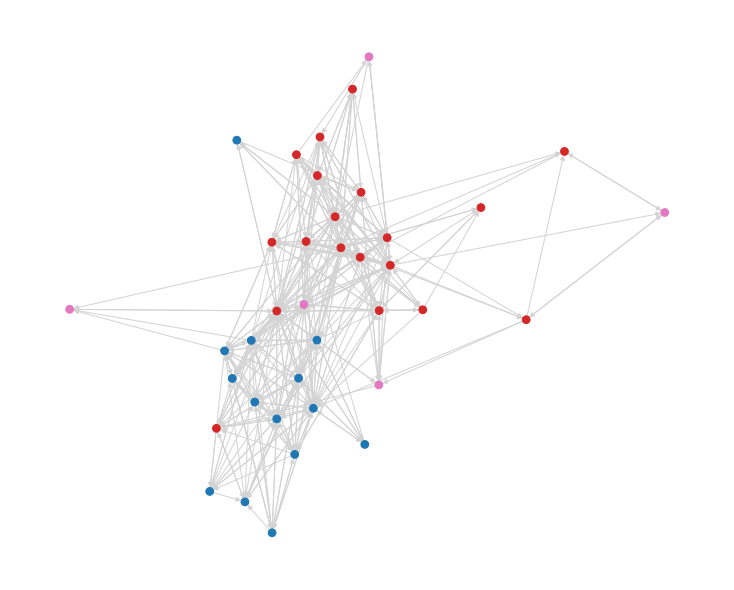

In [22]:
sf.set_seed(4604)

palette = sns.color_palette()
palette = palette.reverse()

nodes_to_display = [er for er in er_pages if er not in er_pages_exclude]
# node_colours = ["green"]*len(H.nodes)
H = nx.subgraph(G, nodes_to_display)

labeldict = {}
for node in H.nodes():
    labeldict[node] = re.split('/', node)[-1]
# assign classes
clusters = [er_page_clusters_df.iloc[er_page_clusters_df["page"].values == node, :]["cluster"].values for node in H.nodes]
# assign node colors
colors = [ sns.color_palette()[:7][-int(clust[0])] for clust in clusters ]

fig = plt.figure(1, figsize=(10, 8))
nx.draw(H, labels=labeldict, with_labels=False, font_weight='bold', node_size=60, node_color = colors, edge_color="lightgrey")